### Ćwiczenie 12
Naszym celem jest poprawa jakości obrazu za pomocą kolejnego
stosowania różnych przekształceń i filtrów. Zastosuj złożone, wieloetapowe podej-
ście do poprawy jakości przedstawione na wykładzie pt. „Filtracja w dziedzinie prze-
strzennej”

In [1]:
import matplotlib.pyplot as plt
import cv2  
from numpy import emath, abs, sqrt
import skimage.morphology as morph 
from skimage.filters import rank,sobel,laplace,unsharp_mask,gaussian

In [2]:
# Załadowanie pliku .tiff
img = cv2.imread("src/bonescan.tif") 

1. Skan PET ciała człowieka
   * wysoki poziom szumów
   * dominacja ciemnych i jasnych poziomów szarości
2. Laplasjan obrazu 1. z maską 3 × 3
   * obraz przeskalowano do zakresu [0, 255]
3. Suma obrazów 1. i 2.
   * uwydatnienie drobnych szczegółów
   * wciąż zauważamy spory poziom szumów
4. Gradient Sobela obrazu 1. \
   M (x, y) ≈ |gx| + |gy|
   * uwydatnienie brzegów

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.36470588235294155..0.3411764705882355].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.07058823529411765..255.21176470588236].


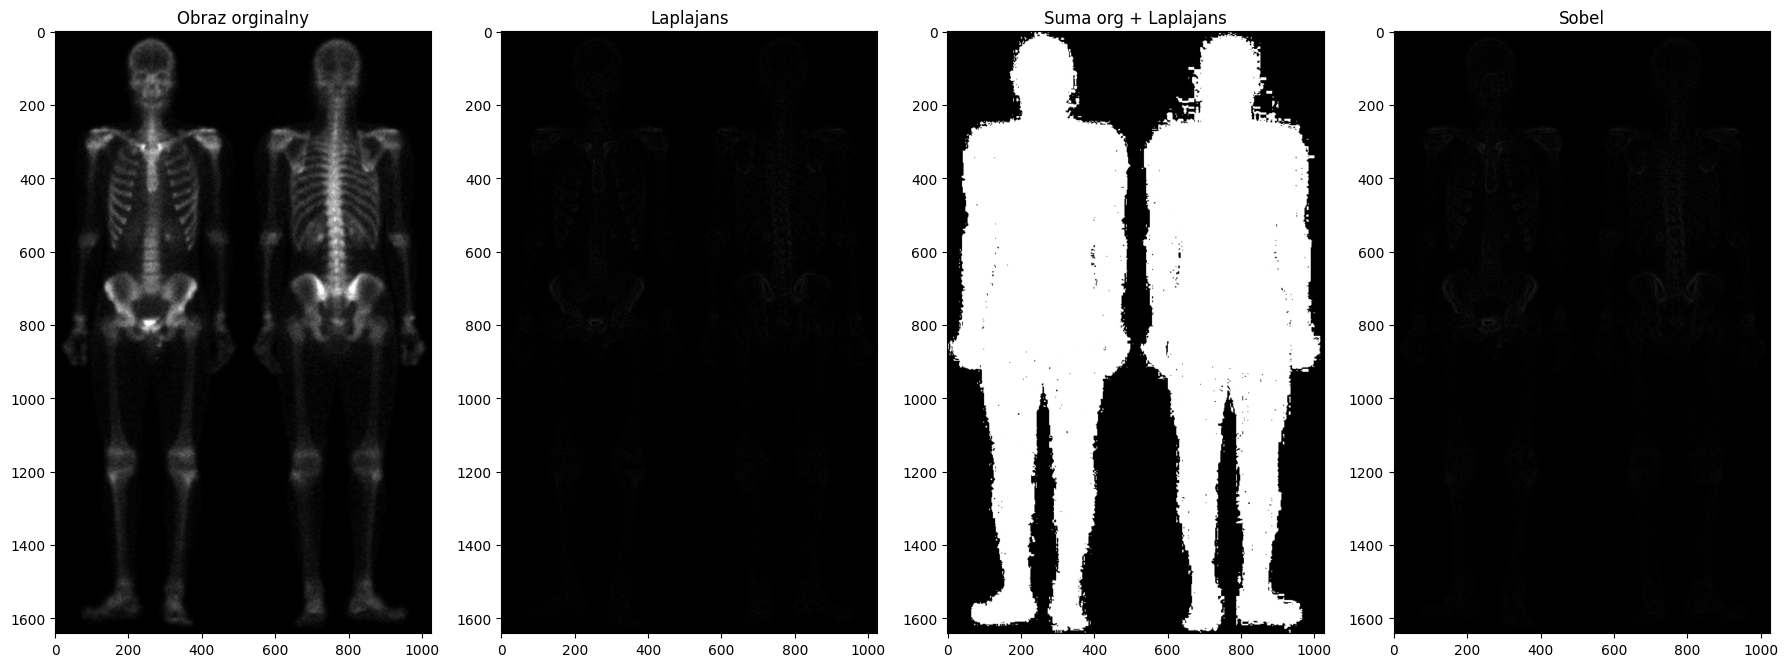

In [3]:
plt.figure(figsize=(18, 10))
plt.subplot(1,4,1)
plt.imshow(img)
plt.title("Obraz orginalny")

plt.subplot(1,4,2)
lap_img = laplace(img)
plt.imshow(lap_img)
plt.title("Laplajans")

plt.subplot(1,4,3)
sum_img = img + lap_img
plt.imshow(sum_img)
plt.title("Suma org + Laplajans")

plt.subplot(1,4,4)
sob_img = sobel(img)
plt.imshow(sob_img)
plt.title("Sobel")

plt.tight_layout()
plt.show()

#### Dzięki zastosowaniu powyższych kroków uzyskano odszumiony obraz z widocznymi krawędziami kości z tomografii komputerowej. Tak widoczne elementy pozwalają na bezproblemowe wyznaczenie granic układu kostnego.

5. Filtracja uśredniająca z maską 5 × 5 obrazu 4.
   * redukcja szumu uwydatnionego przez laplasjan
6. loczyn obrazu 5. i laplasjanu 2.
7. Suma 1. i 6.
8. Transformacja potęgowa 7., c = 1, γ = 0,5 \
    s = crγ
   * zwiększenie kontrastu

ValueError: Image dimensions and neighborhood dimensionsdo not match

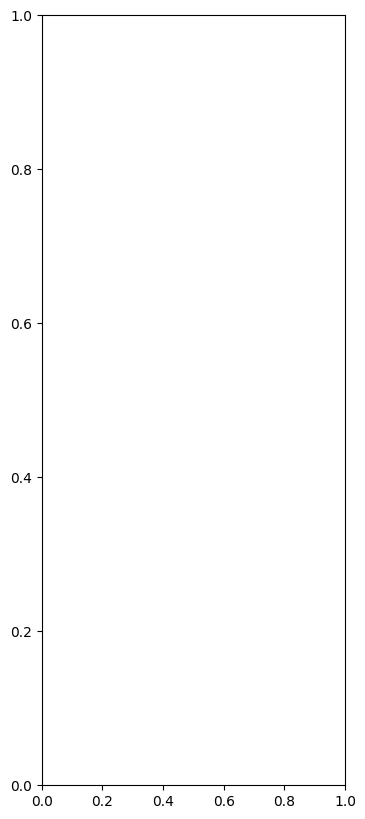

In [4]:
plt.figure(figsize=(18, 10))
plt.subplot(1,4,1)
mean_img = rank.mean(img,morph.footprint_rectangle((5,5)))
plt.imshow(img)
plt.title("Filtracja uśredniająca")

plt.subplot(1,4,2)
ilo_img = mean_img * lap_img
plt.imshow(ilo_img)
plt.title("Iloczyn")

plt.subplot(1,4,3)
sum2_img = img + ilo_img
plt.imshow(sum2_img)
plt.title("Suma")

plt.subplot(1,4,4)
fin_img = sqrt(abs(sum2_img))
plt.imshow(fin_img)
plt.title("Efekt końcowy")

plt.tight_layout()
plt.show()

#### Dzięki zastosowaniu powyższych kroków uzyskano odszumione zdjęcię, gdzie można wyraźnie zauważyć obrys ciała, a nie samych kości jak w zdjęciu oryginalnym. Tak przetworzone zdjęcie pozwala na jasne określenie położenia kości względem powierzchni ciała.